In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df1 = pd.read_csv('data/hiring - hiring.csv')
df2 = pd.read_csv('data/canada_per_capita_income - canada_per_capita_income.csv')


In [7]:
df1.head()

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       6 non-null      object 
 1   test_score       7 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [9]:
df1.describe()

,test_score,interview_score,salary
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [11]:
df1.sample(5)

,experience,test_score,interview_score,salary
1,NaN,8.0,6,45000
2,five,6.0,7,60000
0,NaN,8.0,9,50000
7,eleven,7.0,8,80000
6,ten,NaN,7,72000


In [19]:
df1.experience.isna().sum()

np.int64(2)

In [20]:
df1.experience.unique()

array([nan, 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
      dtype=object)

In [21]:
df1.experience.fillna('zero')

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [22]:
df1.experience = df1.experience.fillna('zero')

In [23]:
print(df1.experience.unique())

['zero' 'five' 'two' 'seven' 'three' 'ten' 'eleven']


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [26]:
df2.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


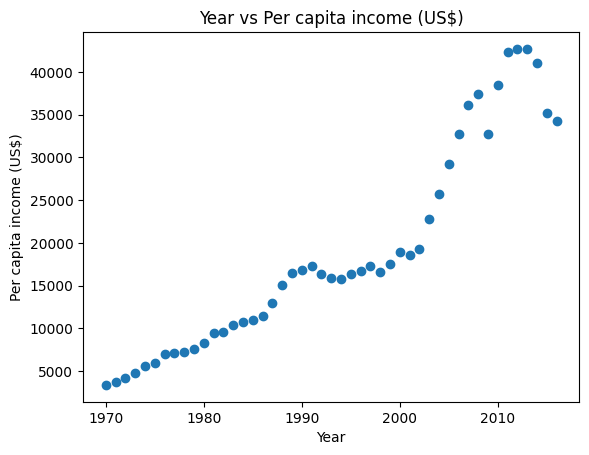

In [29]:
plt.scatter(x=df2['year'], y=df2['per capita income (US$)'])
plt.title('Year vs Per capita income (US$)')
plt.xlabel('Year')
plt.ylabel('Per capita income (US$)')
plt.show()

In [30]:
X = df2.drop(columns=['per capita income (US$)'])
y = df2['per capita income (US$)']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
x_train

,year
27,1997
32,2002
29,1999
43,2013
2,1972
45,2015
26,1996
15,1985
25,1995
16,1986


In [33]:
x_test

,year
28,1998
33,2003
30,2000
4,1974
18,1988
11,1981
42,2012
31,2001
22,1992
10,1980


In [34]:
y_train

27    17310.757750
32    19232.175560
29    17581.024140
43    42676.468370
2      4251.175484
45    35175.188980
26    16699.826680
15    11018.955850
25    16369.317250
16    11482.891530
40    38420.522890
20    16838.673200
41    42334.711210
8      7247.967035
13    10416.536590
5      5998.144346
17    12974.806620
34    25719.147150
14    10790.328720
37    36144.481220
7      7100.126170
38    37446.486090
1      3768.297935
12     9619.438377
35    29198.055690
24    15755.820270
6      7062.131392
23    15875.586730
36    32738.262900
21    17266.097690
19    16426.725480
9      7602.912681
39    32755.176820
46    34229.193630
3      4804.463248
0      3399.299037
44    41039.893600
Name: per capita income (US$), dtype: float64

In [35]:
y_test

28    16622.671870
33    22739.426280
30    18987.382410
4      5576.514583
18    15080.283450
11     9434.390652
42    42665.255970
31    18601.397240
22    16412.083090
10     8355.968120
Name: per capita income (US$), dtype: float64

In [68]:
reg = LinearRegression()

In [69]:
reg.fit(x_train, y_train)

LinearRegression()

In [70]:
y_pred = reg.predict(x_test)

In [71]:
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  22894407.002098337
R2 =  0.7622063756926367
RMSE =  4784.810027796123


In [72]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'MAE': y_test - y_pred, 'MSE': pow(y_test - y_pred, 2), 'RMSE': np.sqrt(pow(y_test - y_pred, 2))})

,y_test,y_pred,MAE,MSE,RMSE
28,16622.671870,23487.887666,-6865.215796,4.713119e+07,6865.215796
33,22739.426280,27680.300039,-4940.873759,2.441223e+07,4940.873759
30,18987.382410,25164.852615,-6177.470205,3.816114e+07,6177.470205
4,5576.514583,3364.308276,2212.206307,4.893857e+06,2212.206307
18,15080.283450,15103.062920,-22.779470,5.189043e+02,22.779470
11,9434.390652,9233.685598,200.705054,4.028252e+04,200.705054
42,42665.255970,35226.642310,7438.613660,5.533297e+07,7438.613660
31,18601.397240,26003.335090,-7401.937850,5.478868e+07,7401.937850
22,16412.083090,18456.992818,-2044.909728,4.181656e+06,2044.909728
10,8355.968120,8395.203123,-39.235003,1.539385e+03,39.235003


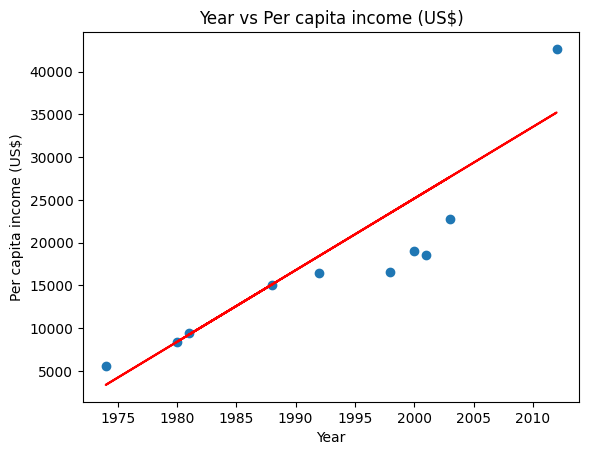

In [73]:
plt.scatter(x=x_test, y= y_test)
plt.plot(x_test, y_pred, color='r')
plt.title('Year vs Per capita income (US$)')
plt.xlabel('Year')
plt.ylabel('Per capita income (US$)')
plt.show()

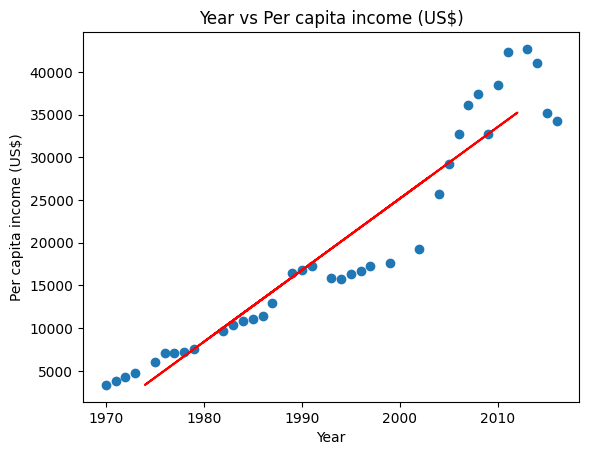

In [74]:
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, y_pred, color='r')
plt.title('Year vs Per capita income (US$)')
plt.xlabel('Year')
plt.ylabel('Per capita income (US$)')
plt.show()

In [75]:
df1.isna().sum()

experience         0
test_score         1
interview_score    0
salary             0
dtype: int64

In [78]:
print(df1.test_score.mean())

7.857142857142857


In [79]:
print(df1.test_score.median())

8.0


In [81]:
df1.test_score.fillna(df1.test_score.mean())

0     8.000000
1     8.000000
2     6.000000
3    10.000000
4     9.000000
5     7.000000
6     7.857143
7     7.000000
Name: test_score, dtype: float64

In [82]:
print(df1.test_score.unique())

[ 8.  6. 10.  9.  7. nan]


In [83]:
df1.test_score = df1.test_score.fillna(df1.test_score.mean())

In [84]:
print(df1.test_score.unique())

[ 8.          6.         10.          9.          7.          7.85714286]


In [86]:
print(df1.isna().sum())

experience         0
test_score         0
interview_score    0
salary             0
dtype: int64


In [87]:
reg = LinearRegression()

In [88]:
print(df1.columns)

Index(['experience', 'test_score', 'interview_score', 'salary'], dtype='object')


In [99]:
# Mapping dictionary
word_to_number = {
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11
}

# Map the column
df1['experience'] = df1['experience'].map(word_to_number)

In [101]:
df1

,experience,test_score,interview_score,salary
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [102]:
df1.isna().sum()

experience         0
test_score         0
interview_score    0
salary             0
dtype: int64

In [103]:
X = df1.drop(columns=['salary'])
y = df1.salary

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
x_train

,experience,test_score,interview_score
1,0,8.0,6
7,11,7.0,8
3,2,10.0,10
0,0,8.0,9
5,3,7.0,10
4,7,9.0,6


In [106]:
x_test

,experience,test_score,interview_score
6,10,7.857143,7
2,5,6.000000,7


In [107]:
y_train

1    45000
7    80000
3    65000
0    50000
5    62000
4    70000
Name: salary, dtype: int64

In [108]:
y_test

6    72000
2    60000
Name: salary, dtype: int64

In [109]:
reg.fit(x_train, y_train)

LinearRegression()

In [110]:
y_pred = reg.predict(x_test)

In [111]:
print(y_pred)

[77818.23189204 57496.5574222 ]


In [112]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
6,72000,77818.231892
2,60000,57496.557422


In [113]:
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  20059523.5449567
R2 =  0.4427910126400917
RMSE =  4478.785945427254
